# Proszę zaimplementować rekurencyjną LU faktoryzację bazując na swoim rekurencyjnym mnożeniu i odwracaniu macierzy


In [2]:
import random


### Tworzenie macierzy

In [3]:
def createMatrix(size):
    matrix = []
    for i in range(size):
        matrix.append([])
        for j in range(size):
            matrix[i].append(random.uniform(0, 1))
    return matrix

### Wyświetlenie macierzy

In [4]:
def printMatrix(matrix):
    for row in matrix:
        print(row)

In [5]:
matrix1 = createMatrix(4)
printMatrix(matrix1)

[0.6775533526765553, 0.4162756957391116, 0.5094071715227771, 0.9108202794273007]
[0.7644571441456138, 0.8824503679873843, 0.7466782421604197, 0.9042249696544066]
[0.38611535867329005, 0.26347956677855244, 0.67575928857797, 0.7129843397298221]
[0.288529861635193, 0.46916237923096893, 0.997908088801734, 0.6927117145464808]


## LU faktoryzacja metodą Doolitle'a

In [6]:
from LU_factorization import doolittleLUFactorization, doolittleLUFactorizationWithOperationCounting

## Blokowa LU factoryzacja - pseudokod albo wzór

In [7]:
from LU_factorization import LUBlockFactorization, LUBlockFactorizationWithOperationCounting


## Porównanie metod faktoryzacji

In [8]:
L, U = doolittleLUFactorization(matrix1)
printMatrix(L)
print('\n\n')
printMatrix(U)

[1.0, 0.0, 0.0, 0.0]
[1.1282611784382153, 1.0, 0.0, 0.0]
[0.5698670918651783, 0.0636115542562703, 1.0, 0.0]
[0.4258407998357717, 0.7071401771772233, 1.7606173514338999, 1.0]



[0.6775533526765553, 0.4162756957391116, 0.5094071715227771, 0.9108202794273007]
[0.0, 0.4127826609575863, 0.17193390651325302, -0.12341819215766414]
[0.0, 0.0, 0.37452792214435865, 0.20178865890740527]
[0.0, 0.0, 0.0, 0.036848626322826816]


In [9]:
L, U = LUBlockFactorization(matrix1)
printMatrix(L)
print('\n\n')
printMatrix(U)

[1.0, 0.0, 0.0, 0.0]
[1.1282611784382153, 1.0, 0.0, 0.0]
[0.5698670918651783, 0.0636115542562703, 1.0, 0.0]
[0.4258407998357717, 0.7071401771772233, 1.7606173514338999, 1.0]



[0.6775533526765553, 0.4162756957391116, 0.5094071715227771, 0.9108202794273007]
[0.0, 0.4127826609575863, 0.17193390651325302, -0.12341819215766414]
[0.0, 0.0, 0.37452792214435865, 0.20178865890740527]
[0.0, 0.0, 0.0, 0.03684862632282676]


## Test poprawności metod

In [10]:
from multiplication import hybridMultiplication, sub

In [11]:
L1, U1 = doolittleLUFactorization(matrix1)
L2, U2 = LUBlockFactorization(matrix1)

dolittleError = sum([sum(row) for row in sub(matrix1, hybridMultiplication(L1, U1, 2**4))])
blockError = sum([sum(row) for row in sub(matrix1, hybridMultiplication(L2, U2, 2**4))])

print(dolittleError)
print(blockError)

-1.1102230246251565e-16
0.0


## TODO Wartości własne i wyznacznik

In [12]:
from LU_factorization import getEigenValues, calculateDeterminant

In [13]:
print(getEigenValues(U1))
print(calculateDeterminant(U1))

[0.6775533526765553, 0.4127826609575863, 0.37452792214435865, 0.036848626322826816]
0.003859850186291881


In [14]:
print(getEigenValues(U2))
print(calculateDeterminant(U2))

[0.6775533526765553, 0.4127826609575863, 0.37452792214435865, 0.03684862632282676]
0.0038598501862918753


In [15]:
matrices = [createMatrix(2**x) for x in range(1,10)]
sizes = [x for x in range(1,10)]

## TODO Testy czasowe

In [17]:
import timeit
def calculateRunningTime(funct,matrix):
    start = timeit.default_timer()
    funct(matrix)
    stop = timeit.default_timer()
    return (stop - start)


In [18]:
matrixTimes1 = []
matrixTimes2 = []

for matrix in matrices:
    matrixTimes1.append(calculateRunningTime(doolittleLUFactorization, matrix))
    matrixTimes2.append(calculateRunningTime(LUBlockFactorization, matrix))

In [19]:
print(matrixTimes1)
print('\n')
print(matrixTimes2)

[2.0899809896945953e-05, 4.619988612830639e-05, 0.00014999997802078724, 0.0002902999985963106, 0.0017246000934392214, 0.010740000056102872, 0.07108470005914569, 0.6647805999964476, 6.102946100058034]


[1.4299992471933365e-05, 0.00021199998445808887, 0.0008151999209076166, 0.003428099909797311, 0.0111134999897331, 0.05542999994941056, 0.3445794000290334, 2.716000000014901, 19.41732469992712]


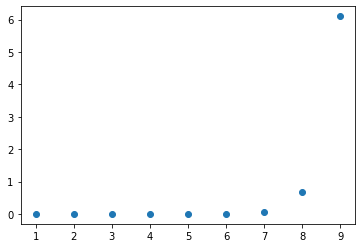

In [20]:
import matplotlib.pyplot as plt


plt.scatter(sizes, matrixTimes1)
plt.show()

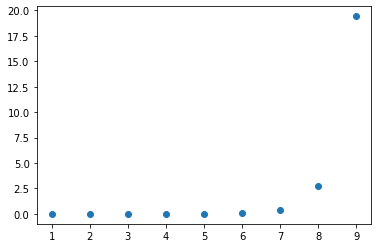

In [21]:
plt.scatter(sizes, matrixTimes2)
plt.show()

## TODO Ilość operacji

In [22]:
from multiplication import hybridMultiplicationWithOperationCounting, sub

matrixOperations1 = []
matrixOperations2 = []



for matrix in matrices:
    L1, U1, fpOperations1 = doolittleLUFactorizationWithOperationCounting(matrix)
    L2, U2, fpOperations2 = LUBlockFactorizationWithOperationCounting(matrix)

    matrixOperations1.append(fpOperations1)
    matrixOperations2.append(fpOperations2)


In [23]:
print(matrixOperations1)
print(matrixOperations2)

[3, 34, 308, 2600, 21328, 172704, 1389888, 11152000, 89347328]
[3, 122, 1300, 11208, 91856, 719008, 5488832, 40475392, 291857024]


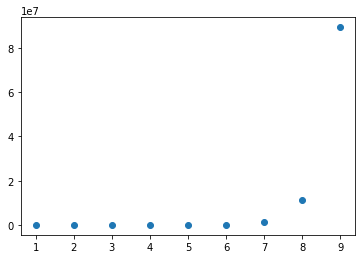

In [24]:
import matplotlib.pyplot as plt


plt.scatter(sizes, matrixOperations1)
plt.show()

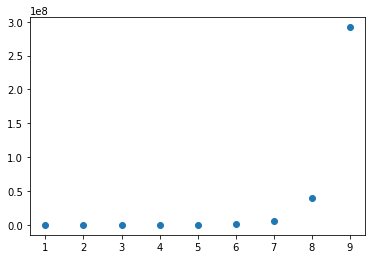

In [25]:
plt.scatter(sizes, matrixOperations2)
plt.show()